In [1]:
import pandas as pd # for data manipulation and analysis
# for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
from regressors import stats

In [2]:
# Reading the file
dt=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
dt.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#checking the shape of the dataset
dt.shape

(205, 26)

In [5]:
# checking the datatypes
dt.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
#checking the null values.
dt.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# corealtion of the dataset
dt.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


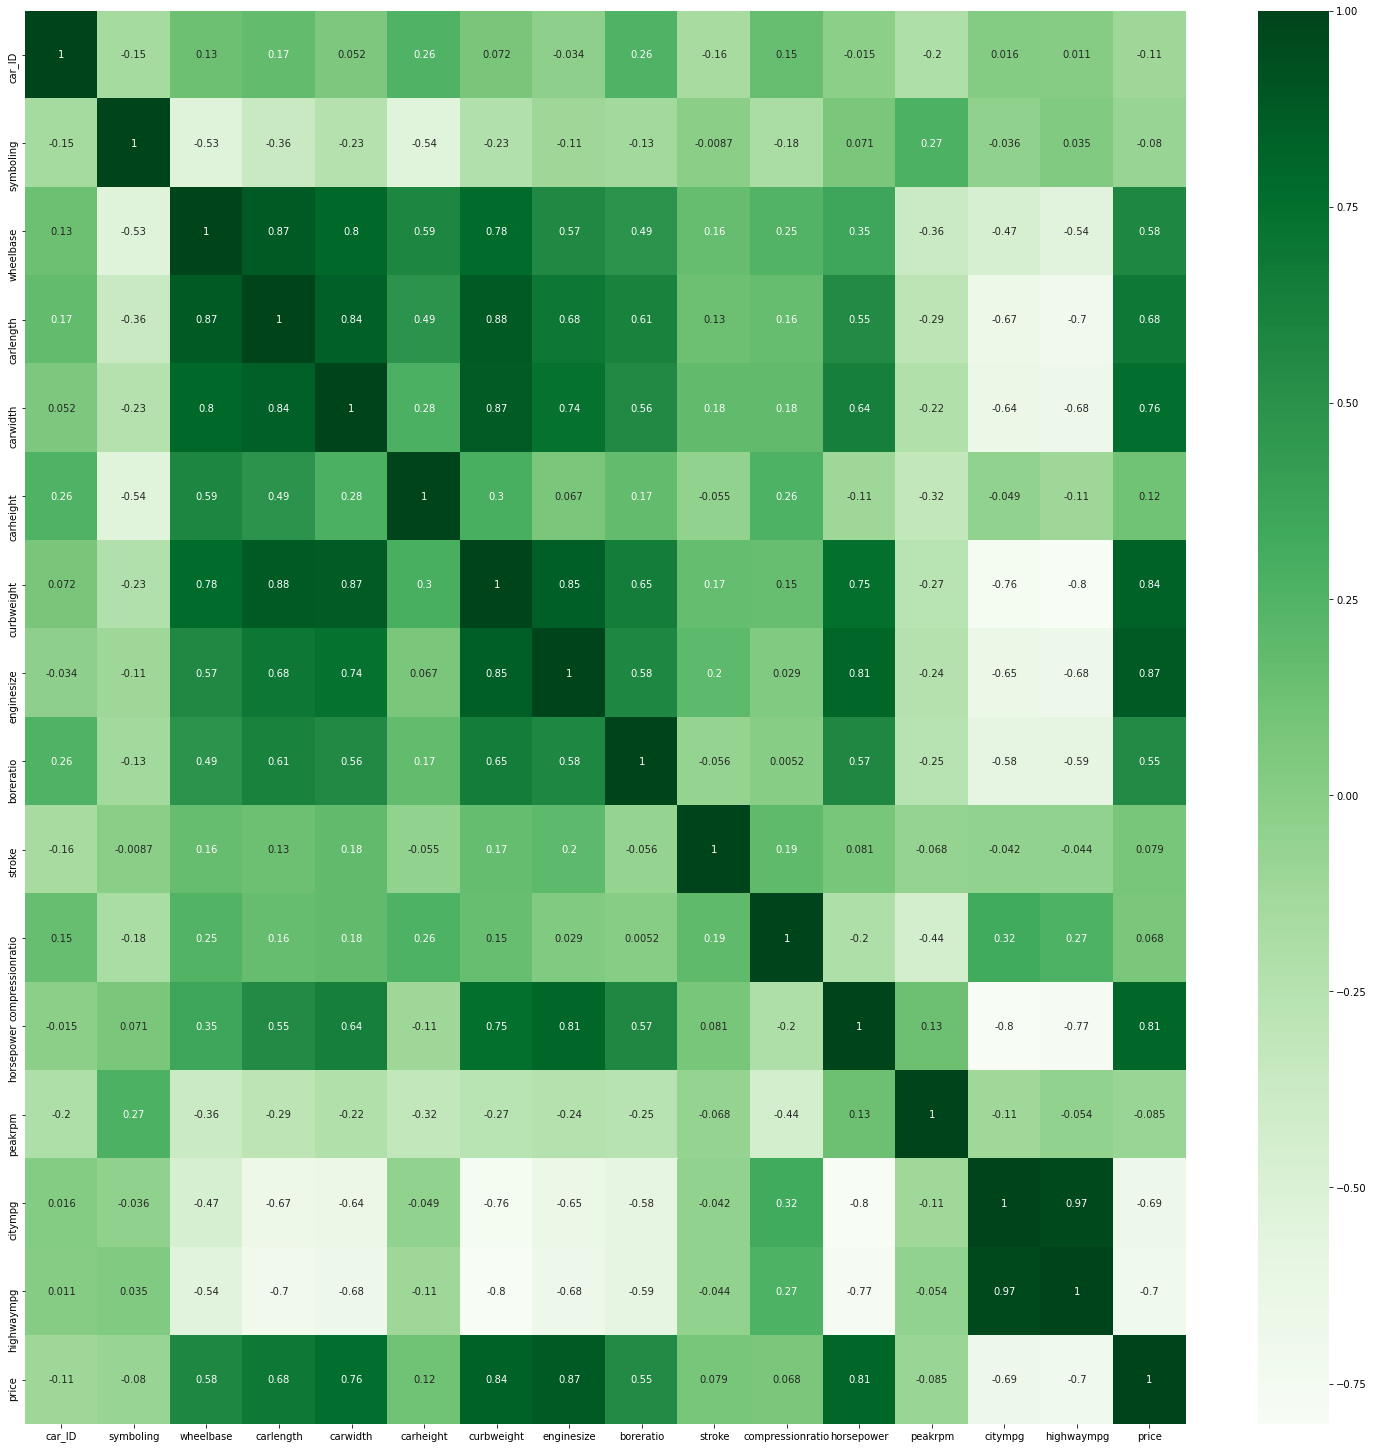

In [8]:
# ploting the heatmap on corelation 
plt.figure(figsize=(26,26))
sns.heatmap(dt.corr(),cmap='Greens',annot=True)

In [9]:
#  encode the categorical data to numerical data
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['CarName']=le.fit_transform(dt['CarName'])
dt['fueltype']=le.fit_transform(dt['fueltype'])
dt['aspiration']=le.fit_transform(dt['aspiration'])
dt['doornumber']=le.fit_transform(dt['doornumber'])
dt['carbody']=le.fit_transform(dt['carbody'])
dt['drivewheel']=le.fit_transform(dt['drivewheel'])
dt['enginelocation']=le.fit_transform(dt['enginelocation'])
dt['enginetype']=le.fit_transform(dt['enginetype'])
dt['cylindernumber']=le.fit_transform(dt['cylindernumber'])
dt['fuelsystem'] =le.fit_transform(dt['fuelsystem'])

In [10]:
# checking the datatypes after encoding the data.
dt.dtypes

car_ID                int64
symboling             int64
CarName               int32
fueltype              int32
aspiration            int32
doornumber            int32
carbody               int32
drivewheel            int32
enginelocation        int32
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int32
cylindernumber        int32
enginesize            int64
fuelsystem            int32
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [11]:
# Seprating the datset with independent and dependent variables and assinging to the x and y variables
x=dt.iloc[:,1:-1]
y=dt['price']

In [12]:
# Spliting the dataset in the form train and test, for the purpose of training and testing of the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
# Fitting the Linear Regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(xtrain,ytrain)

LinearRegression()

In [14]:
#finding the coefficient of all the independent variables.
coeff_df=pd.DataFrame(regressor.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
symboling,282.055665
CarName,-27.999144
fueltype,4282.066737
aspiration,1076.802394
doornumber,-1650.756976
carbody,-947.611813
drivewheel,1208.232686
enginelocation,13691.271165
wheelbase,162.921757
carlength,-36.240137


In [15]:
# finding the intercept
regressor.intercept_

-60983.6490513693

In [16]:
# predicting the model.
y_pred=regressor.predict(xtest)

In [17]:
# Finding the residual sum of square.
print("Residual sum of square :%0.2f"%((y_pred-ytest)**2).sum())

Residual sum of square :598874129.29


In [18]:
## finding the accuracy of the model.
regressor.score(x,y)

0.8903219695231311

In [19]:
# creating the list of all the independent variables.
feature_name=list(x.columns.values)

In [20]:
# checking the summary of the model.
stats.summary(regressor,x,y,feature_name)

Residuals:
        Min         1Q    Median         3Q        Max
-17049.6478 -1527.7402 -177.2988  1413.0299  6448.8949


Coefficients:
                      Estimate    Std. Error  t value   p value
_intercept       -60983.649051  16934.085883  -3.6012  0.000398
symboling           282.055665    223.785197   1.2604  0.208970
CarName             -27.999144      4.601361  -6.0850  0.000000
fueltype           4282.066737   5930.018209   0.7221  0.471060
aspiration         1076.802394    744.044563   1.4472  0.149368
doornumber        -1650.756976    603.992654  -2.7331  0.006826
carbody            -947.611813    331.183637  -2.8613  0.004659
drivewheel         1208.232686    511.310755   2.3630  0.019068
enginelocation    13691.271165   2014.589311   6.7961  0.000000
wheelbase           162.921757     79.738920   2.0432  0.042319
carlength           -36.240137     38.152170  -0.9499  0.343295
carwidth            641.330367    157.507320   4.0717  0.000067
carheight           108.151190 